In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine

%matplotlib inline


In [26]:
wine_data = load_wine()

wine_df = pd.DataFrame(
    data=wine_data.data,
    columns=wine_data.feature_names
)

wine_df['target'] = wine_data.target

wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [27]:
from sklearn.model_selection import train_test_split

X = wine_df.drop(['target'], axis=1)
y = wine_df['target']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.3,
                                                   shuffle=True,
                                                   stratify=y,
                                                   random_state=42)

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

# Initialize classifier
gbc = GradientBoostingClassifier(max_depth=5, random_state=42)

# Train classifier using all features
gbc.fit(X_train, y_train)

# Make predictions
preds = gbc.predict(X_test)

# Evaluate the model using the F1-score
f1_score_all = round(f1_score(y_test, preds, average='weighted'), 3)

print(f1_score_all)

0.908


📌 Variance Threshold — Interview Note

Variance Threshold is a filter-based feature selection method.

It removes near-constant features that add noise but little signal.

Variance is scale-dependent, so features must be scaled first.

I usually apply MinMaxScaler so variance cutoffs like 0.01–0.02 are meaningful.

After scaling, I drop features below a small variance threshold and validate the impact on model performance.

It’s a fast first-pass cleanup, not a final feature selector.

🎯 One-liner

“Variance threshold removes near-constant features; since variance is scale-dependent, I scale first—typically with MinMaxScaler—before applying a small cutoff.”

In [29]:
X_train_v1, X_test_v1, y_tain_v1, y_test_v1 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [38]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

Standardscalar = StandardScaler()
MinMaxscaler = MinMaxScaler()

std_scl = Standardscalar.fit_transform(X_train_v1)#👉 With StandardScaler, variance threshold mostly degenerates into “everything has ~1 variance”.
minmax_scl = MinMaxscaler.fit_transform(X_train_v1)

In [39]:
display(std_scl.var(axis = 0),minmax_scl.var(axis = 0))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

array([0.04522384, 0.04352695, 0.02076785, 0.03023374, 0.02719754,
       0.04637992, 0.07828214, 0.05504516, 0.03328847, 0.04094397,
       0.03467828, 0.06639094, 0.06152349])

In [40]:
X_train_v1.var(axis= 0)

alcohol                             0.658341
malic_acid                          1.123507
ash                                 0.072433
alcalinity_of_ash                  11.471279
magnesium                         232.071532
total_phenols                       0.393226
flavanoids                          0.912299
nonflavanoid_phenols                0.013873
proanthocyanins                     0.335108
color_intensity                     5.669722
hue                                 0.052891
od280/od315_of_diluted_wines        0.470021
proline                         94906.710923
dtype: float64

| **Target type** | **Feature type** | **Valid scoring methods**                                          |
| --------------- | ---------------- | ------------------------------------------------------------------ |
| **Categorical** | **Categorical**  | Chi-squared, Mutual Information                                    |
| **Categorical** | **Numerical**    | t-test (ANOVA), Mutual Information                                 |
| **Numerical**   | **Categorical**  | t-test (ANOVA), Mutual Information                                 |
| **Numerical**   | **Numerical**    | Pearson correlation, Spearman rank correlation, Mutual Information |


Cool. Here are clean, crisp NOTES you can literally copy-paste and memorise.
No extra crap. Just concept + rule of thumb.

📌 Chi-Square Test — NOTES
What it is

Statistical test for association

Used for categorical × categorical variables

When to use

Both variables are nominal / categorical

Data is in counts / frequencies

Example:

Gender × Purchase (Yes/No)

Smoker × Disease (Yes/No)

What it checks

Are the two categorical variables independent, or is there an association?

Hypotheses
Null hypothesis (H₀)

There is no association between the two categorical variables
(they are independent)

Alternative hypothesis (H₁)

There is an association between the two categorical variables

Decision rule
p < 0.05  → reject H₀ → evidence of association
p ≥ 0.05 → fail to reject H₀ → no significant association

Key points to remember

Works on contingency tables

Compares observed vs expected frequencies

Does NOT compare means

If expected counts are small → use Fisher’s Exact Test

One-line takeaway

Chi-square tests whether two categorical variables are associated.

In [42]:
#Nominal vs nominal :
import pandas as pd
from scipy.stats import chi2_contingency

# Raw data
data = {
    "Gender": ["Male","Female","Male","Female","Male",
               "Female","Male","Male","Female","Female"],
    "Purchased": ["Yes","No","Yes","Yes","No",
                  "No","Yes","No","Yes","No"]
}

df = pd.DataFrame(data)

# Create contingency table
contingency = pd.crosstab(df["Gender"], df["Purchased"])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

print("Contingency Table:")
print(contingency, "\n")

print(f"Chi-square statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p:.4f}")

expected_df = pd.DataFrame(
    expected,
    index=contingency.index,
    columns=contingency.columns
)

print("\nExpected Frequencies:")
print(expected_df)


Contingency Table:
Purchased  No  Yes
Gender            
Female      3    2
Male        2    3 

Chi-square statistic: 0.0000
Degrees of freedom: 1
P-value: 1.0000

Expected Frequencies:
Purchased   No  Yes
Gender             
Female     2.5  2.5
Male       2.5  2.5


📌 t-Test — NOTES (Categorical × Numerical)
What it is

Statistical test for difference in means

Used for categorical × numerical variables

When to use

One variable is categorical with exactly 2 groups

One variable is continuous numerical

Example:

Gender × Salary

Treatment × Blood Pressure

Machine Type × Output Length

What it checks

Does group membership change the average value of the numerical variable?

Hypotheses
Null hypothesis (H₀)

The means are equal across the two categories

𝜇
1
=
𝜇
2
μ
1
	​

=μ
2
	​

Alternative hypothesis (H₁)

The means are different

𝜇
1
≠
𝜇
2
μ
1
	​


=μ
2
	​

Decision rule
p < 0.05  → reject H₀ → significant difference in means
p ≥ 0.05 → fail to reject H₀ → no significant difference in means

Key points to remember

Categorical variable splits the data into groups

Numerical variable provides values

t-test compares:

mean difference  vs  variability (noise)


Mean alone is NOT enough → variance + sample size matter

In [43]:
from scipy.stats import ttest_ind

smokers = [3.1, 3.3, 3.0, 3.2, 3.1]
non_smokers = [3.8, 3.9, 4.0, 3.7, 3.9]

# Welch's t-test (safe default)
t_stat, p_value = ttest_ind(smokers, non_smokers, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


T-statistic: -9.9846
P-value: 0.0000


Mutual Information measures how much information one variable provides about another and captures both linear and non-linear dependencies.

In [44]:
X_train_v3, X_test_v3, y_train_v3, y_test_v3 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [45]:
from sklearn.feature_selection import RFE

rfe_f1_score_list = []

for k in range(1, 14):
    RFE_selector = RFE(estimator=gbc, n_features_to_select=k, step=1)
    RFE_selector.fit(X_train_v3, y_train_v3)
    
    sel_X_train_v3 = RFE_selector.transform(X_train_v3)
    sel_X_test_v3 = RFE_selector.transform(X_test_v3)
    
    gbc.fit(sel_X_train_v3, y_train_v3)
    RFE_preds = gbc.predict(sel_X_test_v3)
    
    f1_score_rfe = round(f1_score(y_test_v3, RFE_preds, average='weighted'), 3)
    
    rfe_f1_score_list.append(f1_score_rfe)

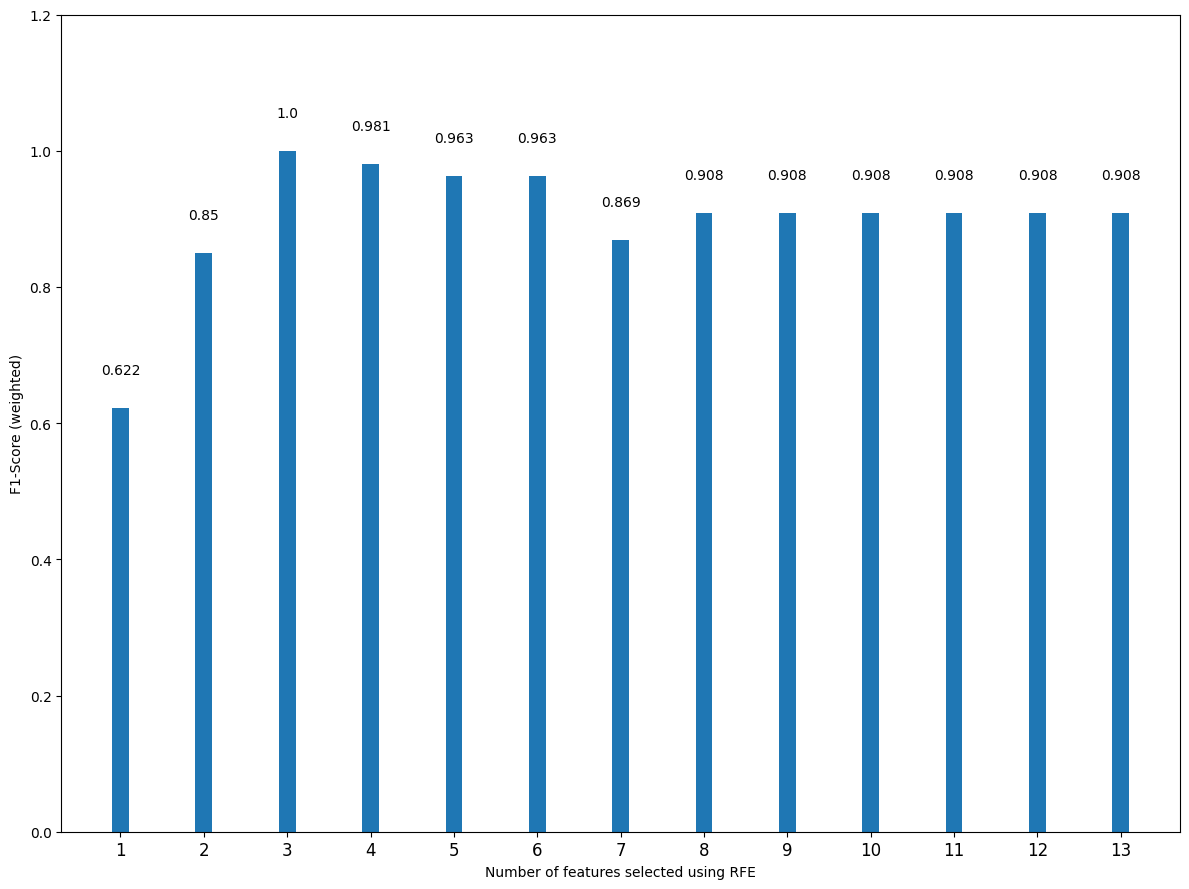

In [46]:
fig, ax = plt.subplots()

x = np.arange(1, 14)
y = rfe_f1_score_list

ax.bar(x, y, width=0.2)
ax.set_xlabel('Number of features selected using RFE')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(1, 14))
ax.set_xticklabels(np.arange(1, 14), fontsize=12)

for i, v in enumerate(y):
    plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')
    
plt.tight_layout()

In [47]:
RFE_selector = RFE(estimator=gbc, n_features_to_select=3, step=10)
RFE_selector.fit(X_train_v3, y_train_v3)

selected_features_mask = RFE_selector.get_support()

selected_features = X_train_v3.columns[selected_features_mask]
selected_features

Index(['color_intensity', 'od280/od315_of_diluted_wines', 'proline'], dtype='str')

📌 Recursive Feature Elimination (RFE) — Note

RFE is a wrapper feature selection method that uses a model’s feature importance.

Feature selection happens during:

RFE_selector.fit(X_train, y_train)


Inside .fit():

Train the model on the current feature set

Compute feature importance

Remove the least important feature(s)

Retrain and repeat until only k features remain

step=1 means one feature is removed at a time (most precise).

Selected features are applied using:

RFE_selector.transform(X)


The line:

f1_score(...)


does NOT select features — it only evaluates how good the selected feature subset is.

The loop over k measures model performance for different numbers of selected features to find the optimal feature count.

🔑 One-sentence summary

RFE repeatedly trains a model, removes the weakest feature based on importance, and retrains until the desired number of features remains; F1 score is used only to evaluate the final selected subset.

In [48]:
X_train_v4, X_test_v4, y_train_v4, y_test_v4 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [50]:
from boruta import BorutaPy

boruta_selector = BorutaPy(gbc, random_state=42)

boruta_selector.fit(X_train_v4.values, y_train_v4.values.ravel())

sel_X_train_v4 = boruta_selector.transform(X_train_v4.values)
sel_X_test_v4 = boruta_selector.transform(X_test_v4.values)

gbc.fit(sel_X_train_v4, y_train_v4)

boruta_preds = gbc.predict(sel_X_test_v4)

boruta_f1_score = round(f1_score(y_test_v4, boruta_preds, average='weighted'), 3)

In [51]:
selected_features_mask = boruta_selector.support_

selected_features = X_train_v4.columns[selected_features_mask]
selected_features

Index(['malic_acid', 'ash', 'magnesium', 'flavanoids', 'proanthocyanins',
       'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'],
      dtype='str')

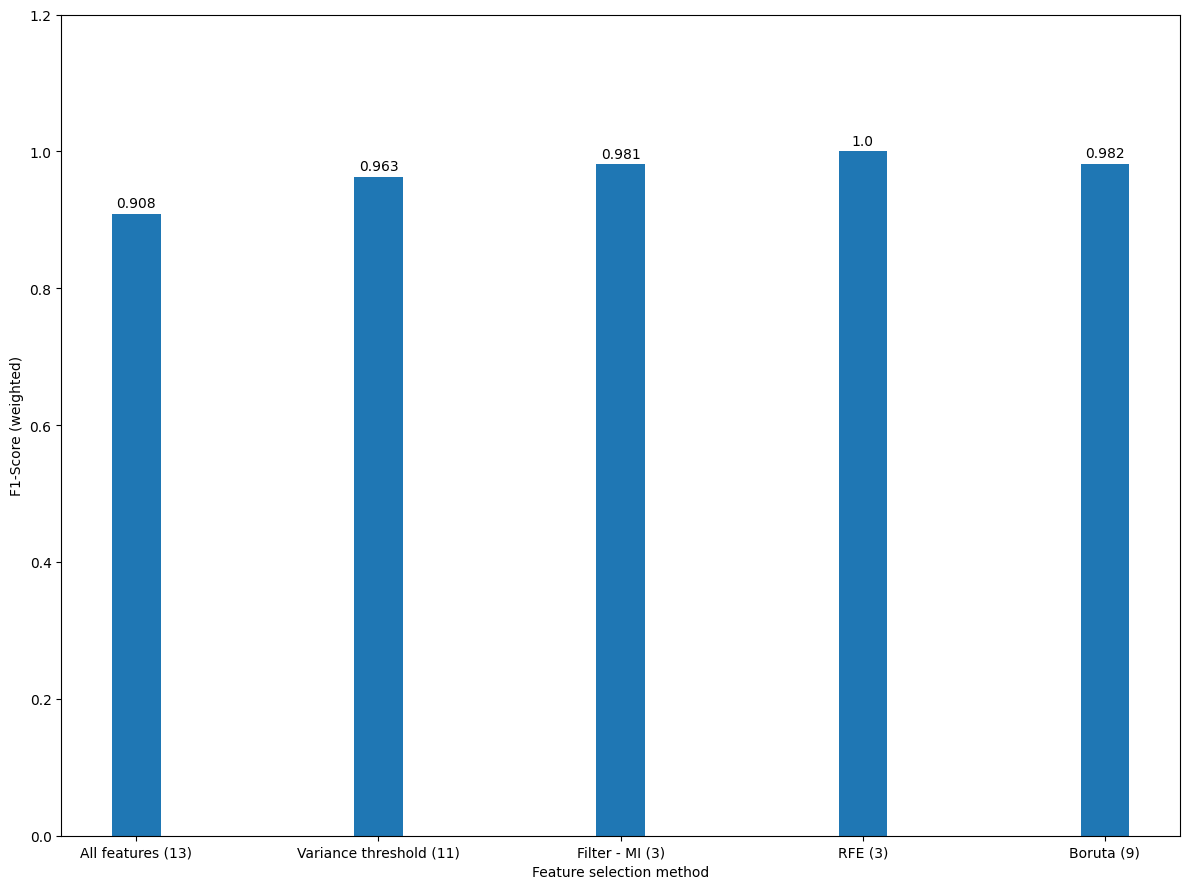

In [52]:
fig, ax = plt.subplots()

x = ['All features (13)', 'Variance threshold (11)', 'Filter - MI (3)', 'RFE (3)', 'Boruta (9)']
y = [f1_score_all, f1_score_var, 0.981, 1.0, boruta_f1_score]

ax.bar(x, y, width=0.2)
ax.set_xlabel('Feature selection method')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 1.2)

for i, v in enumerate(y):
    plt.text(x=i, y=v+0.01, s=str(v), ha='center')
    
plt.tight_layout()

📌 Boruta Feature Selection — Note

Boruta is a wrapper, all-relevant feature selection method.

It uses a tree-based model’s feature importance (Random Forest / Gradient Boosting).

For every real feature, Boruta creates a shadow feature by randomly shuffling it.

The model is trained on real + shadow features.

A real feature is:

Confirmed if its importance is consistently higher than the best shadow feature

Rejected if consistently lower

Tentative if unclear (tested again)

The process is repeated over many iterations to ensure stability.

Boruta does not require choosing k — it automatically selects all relevant features.

Feature selection happens during:

boruta_selector.fit(X_train, y_train)


Model training and F1 score are used only to evaluate, not to select features.

🔑 Key difference vs RFE

RFE → finds the best subset of size k

Boruta → finds all features that beat randomness

🧠 One-line summary

Boruta keeps features that are consistently more important than shuffled noise, making it a robust all-relevant feature selector.